In [156]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pylab as plt

In [157]:
airlines = pd.read_csv('C:\\Data science\\Data sets\\Clustering\\EastWestAirlines.csv') 
airlines.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [158]:
#Normalisation of data

def norm(i):
    x = (i-i.min())/i.max()-i.min()
    return (x)
    
dnorm = norm(airlines.iloc[:,1:])

dnorm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,-1.0,-1.0,-1.0,0.000660,0.011628,0.000000,0.000000,-1.156461,0.0
1,0.011288,0.0,-1.0,-1.0,-1.0,0.000815,0.023256,0.000000,0.000000,-1.160318,0.0
2,0.024257,0.0,-1.0,-1.0,-1.0,0.015636,0.046512,0.000000,0.000000,-1.152363,0.0
3,0.008667,0.0,-1.0,-1.0,-1.0,0.001896,0.011628,0.000000,0.000000,-1.162247,0.0
4,0.057338,0.0,-0.4,-1.0,-1.0,0.164211,0.302326,0.067398,0.075472,-1.164296,1.0


In [159]:
dnorm.keys()

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [160]:
#scalling the data for scatter plots 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dnorm)

StandardScaler()

In [161]:
scaled_data = scaler.transform(dnorm)
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [162]:
#Principal component seperation   PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)

PCA(n_components=2)

In [163]:
#scaled_data.shape
x_pca = pca.transform(scaled_data)
x_pca.shape

(3999, 2)

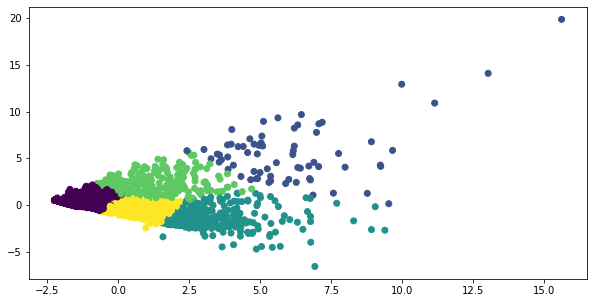

In [164]:
model = KMeans(n_clusters = 5).fit(x_pca)
plt.figure(figsize=(10,5))
plt.scatter(x_pca[:,0],x_pca[:,1],c=model.labels_)

([<matplotlib.axis.XTick at 0x1f77d4fe4f0>,
 <a list of 18 Text major ticklabel objects>)

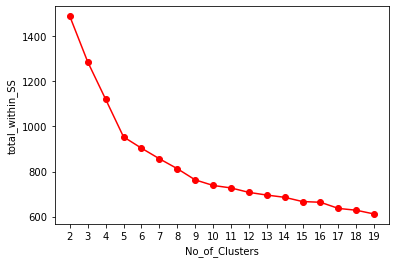

In [170]:
# **************elbow curve plots
k = list(range(2,20))
TWSS = []
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dnorm)
    
    WSS = []
    for j in range(i):
        WSS.append(sum(cdist(dnorm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,dnorm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
    #scree plots 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)
    

In [167]:
model1 = KMeans(n_clusters = 5)
model1.fit(dnorm)

model1.labels_ 
md=pd.Series(model1.labels_)  
airlines['clust']=md 
dnorm.head()


airlines.iloc[:,1:].groupby(airlines.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,33405.995220,95.324092,1.094646,1.016252,1.006692,3464.128107,6.284895,211.005736,0.599426,1982.740918,0.0,0
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,1
2,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,2
3,119484.364686,70.689769,3.595710,1.001650,1.023102,31574.331683,17.295380,226.805281,0.633663,4490.016502,0.0,3
4,49937.579677,90.110855,1.120092,1.019630,1.001155,3459.351039,6.890300,244.397229,0.729792,5572.176674,0.0,4
